In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Hipótesis:
-Verificar si las canciones que sugiere  “Discover weekly playlist” se basan en mis hábitos musicales (las que me gustan, comparto, guardo, y no me gustan)
-¿La música que se presenta a menudo acústica?  

Planteamiento del Problema: 
Obtener una mayor comprensión de los comportamientos musicales al escuchar Spotify.


Beats Per Minute (BPM) - The tempo of the song.
Energy - The energy of a song - the higher the value, the more energtic. song
Danceability - The higher the value, the easier it is to dance to this song.
Loudness - The higher the value, the louder the song.
Valence - The higher the value, the more positive mood for the song.
Length - The duration of the song.
Acoustic - The higher the value the more acoustic the song is.
Popularity - The higher the value the more popular the song is.
Rnd - A randon number. Sort by this column to shuffle your playlist.

In [2]:
like = pd.read_csv('like.csv' ,encoding ="latin-1!")
dislike = pd.read_csv('dislike.csv' ,encoding ="latin-1!")

In [3]:
like.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND,Label
0,1,Annie,A R I Z O N A,5/19/2017,94,79,63,-5,33,3:20,1,54,9832,1
1,2,I Want Candy,Aaron Carter,9/7/2000,110,90,79,-4,95,3:13,1,50,5160,1
2,3,I'm Yours,Alessia Cara,8/26/2015,103,83,50,-3,38,3:49,1,0,7130,1
3,4,I'm Yours,Alessia Cara,11/13/2015,103,83,50,-3,40,3:49,1,55,2962,1
4,5,Home Alone,Ansel Elgort,7/22/2016,135,78,48,-3,10,4:16,1,55,4593,1


In [4]:
dislike.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND,Label
0,1,Solve,Behemoth,10/5/2018,116,74,36,-9,3,2:05,2,33,4506,0
1,2,Bartzabel,Behemoth,10/5/2018,109,91,47,-6,18,5:01,2,48,1056,0
2,3,Ora Pro Nobis Lucifer (Live),Behemoth,4/13/2018,172,96,18,-6,4,6:20,0,19,7333,0
3,4,Amen (Live),Behemoth,4/13/2018,128,97,24,-7,4,3:54,0,23,6829,0
4,5,The Satanist (Live),Behemoth,4/13/2018,112,89,32,-7,23,6:35,0,25,6663,0


In [5]:
dislike

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND,Label
0,1,Solve,Behemoth,10/5/2018,116,74,36,-9,3,2:05,2,33,4506,0
1,2,Bartzabel,Behemoth,10/5/2018,109,91,47,-6,18,5:01,2,48,1056,0
2,3,Ora Pro Nobis Lucifer (Live),Behemoth,4/13/2018,172,96,18,-6,4,6:20,0,19,7333,0
3,4,Amen (Live),Behemoth,4/13/2018,128,97,24,-7,4,3:54,0,23,6829,0
4,5,The Satanist (Live),Behemoth,4/13/2018,112,89,32,-7,23,6:35,0,25,6663,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,Toledo,Dopelord,2/1/2019,110,42,42,-12,26,7:10,1,28,8455,0
1296,1297,Diablerie,Windhand,10/5/2018,80,77,32,-9,42,5:21,0,38,2239,0
1297,1298,Prosper On The Path,Conan,9/14/2018,174,88,22,-8,15,5:24,0,13,727,0
1298,1299,YeYin,Druids,12/1/2017,112,91,22,-6,12,4:07,0,23,7561,0


In [6]:
like['LENGTH'] = like['LENGTH'].str.replace(':','.')
dislike['LENGTH'] = dislike['LENGTH'].str.replace(':','.')

In [7]:
print(len(dislike.columns.values))

14


In [8]:
like['LENGTH'] = like['LENGTH'].str.replace(':','.')
dislike['LENGTH'] = dislike['LENGTH'].str.replace(':','.')

In [9]:
like[['LENGTH','SEC']] = like['LENGTH'].str.split('.',expand=True)
dislike[['LENGTH','SEC']] = dislike['LENGTH'].str.split('.',expand=True)

In [10]:
like.rename(columns={'LENGTH':'MIN'}, inplace=True)
dislike.rename(columns={'LENGTH':'MIN'}, inplace=True)

In [11]:
like['MIN'] =  like['MIN'].astype(int) 
like['SEC'] = like['SEC'].astype(int)
dislike['MIN'] = dislike['MIN'].astype(int)
dislike['SEC'] = dislike['SEC'].astype(int)

In [12]:
dislike['MIN'] = dislike['MIN'] *60
like['MIN'] =  like['MIN'] * 60

In [13]:
like['DURATION'] = like['MIN'] + like ['SEC']
dislike['DURATION'] = dislike['MIN'] + dislike ['SEC']

In [14]:
dislike.drop(['MIN', 'SEC'], axis=1, inplace=True)
like.drop(['MIN', 'SEC'], axis=1, inplace=True)

In [15]:
like.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,RND,Label,DURATION
0,1,Annie,A R I Z O N A,5/19/2017,94,79,63,-5,33,1,54,9832,1,200
1,2,I Want Candy,Aaron Carter,9/7/2000,110,90,79,-4,95,1,50,5160,1,193
2,3,I'm Yours,Alessia Cara,8/26/2015,103,83,50,-3,38,1,0,7130,1,229
3,4,I'm Yours,Alessia Cara,11/13/2015,103,83,50,-3,40,1,55,2962,1,229
4,5,Home Alone,Ansel Elgort,7/22/2016,135,78,48,-3,10,1,55,4593,1,256


In [16]:
dislike.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,RND,Label,DURATION
0,1,Solve,Behemoth,10/5/2018,116,74,36,-9,3,2,33,4506,0,125
1,2,Bartzabel,Behemoth,10/5/2018,109,91,47,-6,18,2,48,1056,0,301
2,3,Ora Pro Nobis Lucifer (Live),Behemoth,4/13/2018,172,96,18,-6,4,0,19,7333,0,380
3,4,Amen (Live),Behemoth,4/13/2018,128,97,24,-7,4,0,23,6829,0,234
4,5,The Satanist (Live),Behemoth,4/13/2018,112,89,32,-7,23,0,25,6663,0,395


In [17]:
result = like.append(dislike)

In [18]:
result.describe()

,#,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,RND,Label,DURATION
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,650.500000,124.098846,76.769231,49.845000,-6.175000,41.475769,13.108846,39.691923,4999.406923,0.500000,247.019231
std,375.349754,28.813978,19.758191,18.544255,2.768298,24.528305,21.652723,22.354486,2872.248034,0.500096,85.460617
min,1.000000,45.000000,2.000000,6.000000,-31.000000,2.000000,0.000000,0.000000,4.000000,0.000000,32.000000
25%,325.750000,101.000000,65.000000,37.000000,-7.000000,22.000000,0.000000,23.000000,2470.000000,0.000000,201.000000
50%,650.500000,123.000000,82.000000,51.000000,-6.000000,38.000000,2.000000,40.000000,5041.500000,0.500000,230.000000
75%,975.250000,142.000000,93.000000,63.250000,-4.000000,59.000000,17.000000,58.000000,7488.250000,1.000000,274.000000
max,1300.000000,219.000000,100.000000,95.000000,0.000000,98.000000,100.000000,100.000000,9999.000000,1.000000,1019.000000


In [19]:
result.drop(['#', 'RND'], axis=1, inplace=True)

In [20]:
#sns.pairplot(result)

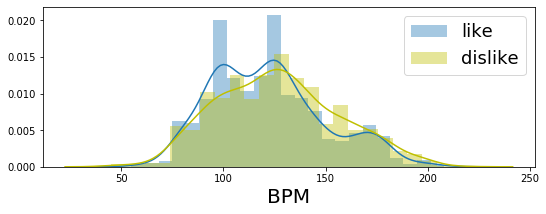

In [21]:
plt.figure(figsize=(30, 10))
plt.subplot(331)
sns.distplot(like.BPM, label='like')
sns.distplot(dislike.BPM, color='y', label='dislike')
plt.xlabel('BPM', fontsize=20)
plt.legend(fontsize=18)

Beats Per Minute (BPM) - The tempo of the song.
Energy - The energy of a song - the higher the value, the more energtic.
Danceability - The higher the value, the easier it is to dance to this song.
Loudness - The higher the value, the louder the song.
Valence - The higher the value, the more positive mood for the song.
Acoustic - The higher the value the more acoustic the song is.


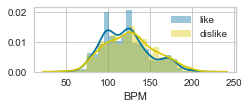

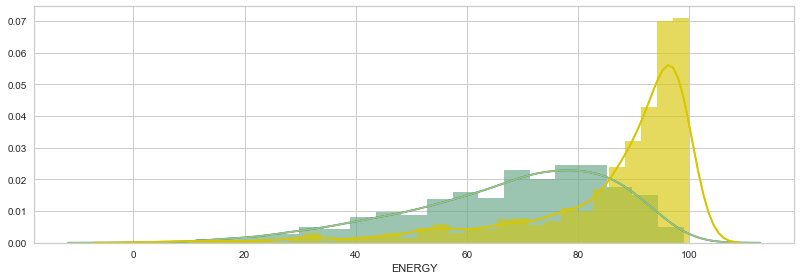

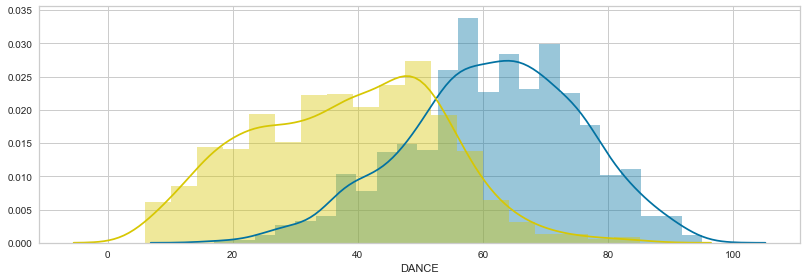

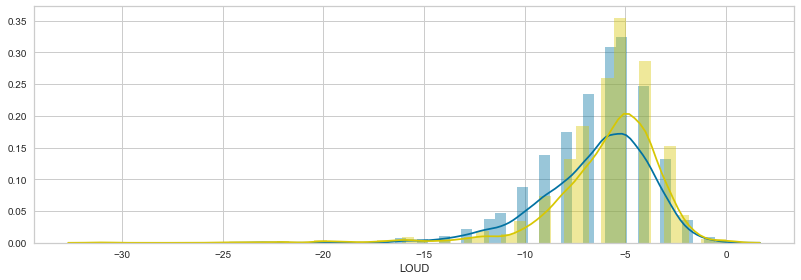

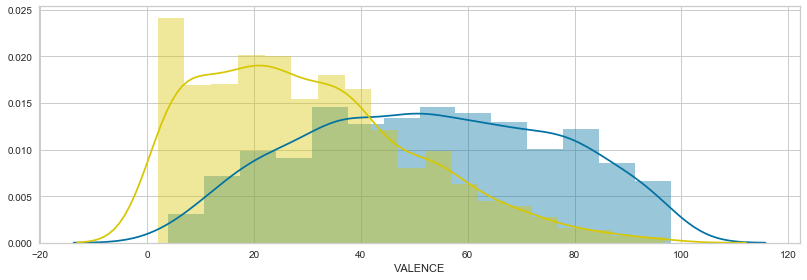

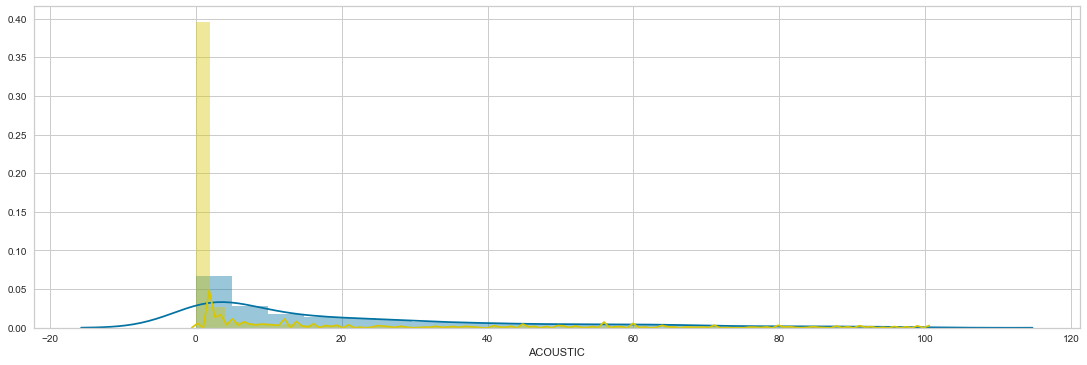

In [107]:
# USE SEABORN'S DISTRIBUTION PLOT
print("Beats Per Minute (BPM) - The tempo of the song.")
plt.figure(figsize=(30, 20))
plt.subplot(421)
sns.distplot(like.BPM, label='like')
sns.distplot(dislike.BPM, color='y', label='dislike')
plt.xlabel('BPM')
plt.legend()

print("Energy - The energy of a song - the higher the value, the more energtic.")
plt.figure(figsize=(30, 20))
plt.subplot(422)
sns.distplot(like.ENERGY, label='like')
sns.distplot(dislike.ENERGY, color='y', label='dislike')
sns.distplot(like.ENERGY)
sns.distplot(dislike.ENERGY, color='y')
plt.xlabel('ENERGY')


print("Danceability - The higher the value, the easier it is to dance to this song.")
plt.figure(figsize=(30, 20))
plt.subplot(423)
sns.distplot(like.DANCE)
sns.distplot(dislike.DANCE, color='y')
plt.xlabel('DANCE')

print("Loudness - The higher the value, the louder the song.")
plt.figure(figsize=(30, 20))
plt.subplot(424)
sns.distplot(like.LOUD)
sns.distplot(dislike.LOUD, color='y')
plt.xlabel('LOUD')

print("Valence - The higher the value, the more positive mood for the song.")
plt.figure(figsize=(30, 20))
plt.subplot(425)
sns.distplot(like.VALENCE)
sns.distplot(dislike.VALENCE, color='y')
plt.xlabel('VALENCE')

print('Acoustic - The higher the value the more acoustic the song is.')
plt.figure(figsize=(30, 20))
plt.subplot(426)
sns.distplot(like.ACOUSTIC)
sns.distplot(dislike.ACOUSTIC, color='y')
plt.xlabel('ACOUSTIC')


plt.tight_layout()
plt.show()

Beats Per Minute (BPM) - The tempo of the song.


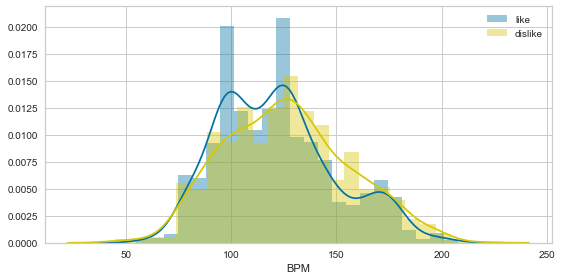

In [111]:
print("Beats Per Minute (BPM) - The tempo of the song.")
plt.figure(figsize=(20, 20))
plt.subplot(421)
sns.distplot(like.BPM, label='like')
sns.distplot(dislike.BPM, color='y', label='dislike')
plt.xlabel('BPM')
plt.legend()

In [23]:
result.corr()

,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,Label,DURATION
BPM,1.000000,0.164436,-0.202483,0.103641,-0.032846,-0.135068,0.005939,-0.090505,0.023427
ENERGY,0.164436,1.000000,-0.274604,0.679343,-0.077379,-0.651378,-0.083645,-0.444030,0.072602
DANCE,-0.202483,-0.274604,1.000000,0.026356,0.581158,0.231241,0.248416,0.628327,-0.328602
LOUD,0.103641,0.679343,0.026356,1.000000,0.089584,-0.456331,0.058487,-0.089631,-0.044657
VALENCE,-0.032846,-0.077379,0.581158,0.089584,1.000000,0.145307,0.169669,0.465941,-0.345190
ACOUSTIC,-0.135068,-0.651378,0.231241,-0.456331,0.145307,1.000000,0.072029,0.350512,-0.165147
POP.,0.005939,-0.083645,0.248416,0.058487,0.169669,0.072029,1.000000,0.202218,-0.058825
Label,-0.090505,-0.444030,0.628327,-0.089631,0.465941,0.350512,0.202218,1.000000,-0.242930
DURATION,0.023427,0.072602,-0.328602,-0.044657,-0.345190,-0.165147,-0.058825,-0.242930,1.000000


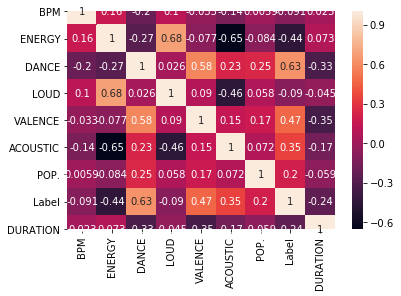

In [24]:
correlation_matrix = result.corr()
sns.heatmap(data=correlation_matrix, annot=True)

In [25]:
X = result[['BPM', 'ENERGY', 'DANCE' , 'LOUD' , 'VALENCE','ACOUSTIC','POP.','DURATION']]
y = result['Label']

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [170]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
predictions = lm.predict(X_test)

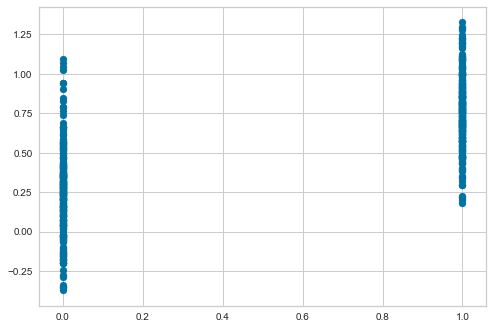

In [172]:
plt.scatter(y_test,predictions)

In [173]:
print(lm.coef_)

[ 9.65215070e-04 -1.05857564e-02  1.05182384e-02  3.40580547e-02
  3.72180240e-03  1.28429386e-03  4.39634640e-04 -7.41463202e-05]


In [174]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})   

In [175]:
df

,Actual,Predicted
512,0,-0.033641
1072,0,0.299552
1286,0,0.531694
4,1,0.460252
19,0,0.057091
...,...,...
917,1,0.434443
51,1,0.515991
1112,0,0.550178
251,0,-0.157623


In [176]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, predictions)

In [177]:
r2

0.5140194592503384

C:\Users\m.a.cardenas.rubio\AppData\Local\Continuum\anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8557692307692307


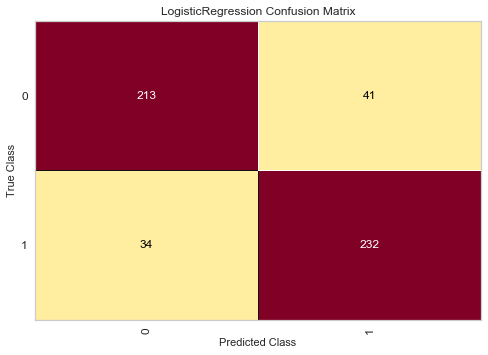

In [178]:
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

clf = LogisticRegression(random_state=0).fit(X, y)
cm = ConfusionMatrix(clf, classes=[0,1])
cm.fit(X_train, y_train)
print(cm.score(X_test, y_test))
cm.show()

In [37]:
dw= pd.read_csv('DW.csv' ,encoding ="latin-1!")

In [38]:
dw.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND
0,1,Lookalike,Conan Gray,11/16/2018,122,30,43,-10,17,3:41,77,72,489
1,2,2:00 AM,Adeline Hill,2/2/2018,85,44,52,-8,15,4:52,53,41,503
2,3,Why Don't You Love Me,Hot Chelle Rae,11/25/2011,148,80,53,-6,57,3:31,12,62,3206
3,4,Lie To Me (feat. Julia Michaels),5 Seconds of Summer,12/21/2018,160,52,61,-5,77,2:30,1,79,9831
4,5,Norway,The Brummies,4/6/2018,110,33,63,-12,6,3:00,67,45,5186


In [39]:
dw['LENGTH'] = dw['LENGTH'].str.replace(':','.')
dw[['LENGTH','SEC']] = dw['LENGTH'].str.split('.',expand=True)
dw.rename(columns={'LENGTH':'MIN'}, inplace=True)
dw['MIN'] =  dw['MIN'].astype(int) 
dw['SEC'] = dw['SEC'].astype(int)
dw['MIN'] = dw['MIN'] *60
dw['DURATION'] = dw['MIN'] + dw['SEC']
dw.drop(['MIN', 'SEC'], axis=1, inplace=True)

In [40]:
dw.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,RND,DURATION
0,1,Lookalike,Conan Gray,11/16/2018,122,30,43,-10,17,77,72,489,221
1,2,2:00 AM,Adeline Hill,2/2/2018,85,44,52,-8,15,53,41,503,292
2,3,Why Don't You Love Me,Hot Chelle Rae,11/25/2011,148,80,53,-6,57,12,62,3206,211
3,4,Lie To Me (feat. Julia Michaels),5 Seconds of Summer,12/21/2018,160,52,61,-5,77,1,79,9831,150
4,5,Norway,The Brummies,4/6/2018,110,33,63,-12,6,67,45,5186,180


In [41]:
resultado = pd.DataFrame(clf.predict(dw[['BPM', 'ENERGY', 'DANCE' , 'LOUD' , 'VALENCE','ACOUSTIC','POP.','DURATION']]))

In [42]:
titleartist = dw[['TITLE','ARTIST']]

In [43]:
predictedDW = pd.concat([titleartist, resultado],axis =1)
predictedDW

,TITLE,ARTIST,0
0,Lookalike,Conan Gray,1
1,2:00 AM,Adeline Hill,1
2,Why Don't You Love Me,Hot Chelle Rae,1
3,Lie To Me (feat. Julia Michaels),5 Seconds of Summer,1
4,Norway,The Brummies,1
5,Lately,RuthAnne,1
6,Nobody Wants To Hear Songs Anymore,Ben Abraham,1
7,Yellow,Molly Tetterton,1
8,Happy Birthday You're Alone,Joshua Speers,1
9,Thought I'd Hit the Lotto,Alexander Wren,1


In [163]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(df_model_test, target, random_state=1, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [164]:
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

In [165]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [166]:
model.score(X_test, y_test)

0.8987179487179487

In [167]:
rf_predictions = model.predict(X_test)
rf_predictions= pd.DataFrame(rf_predictions)

In [168]:
rf_predictions.head()

,0
0,0
1,0
2,1
3,1
4,0


In [157]:
rf_probs = model.predict_proba(X_test)
rf_probs = pd.DataFrame(rf_probs)
type(rf_probs)
rf_probs.columns=['No','Yes']
rf_probs

,No,Yes
0,1.00,0.00
1,0.81,0.19
2,0.38,0.62
3,0.32,0.68
4,1.00,0.00
...,...,...
1035,0.22,0.78
1036,0.08,0.92
1037,0.01,0.99
1038,0.01,0.99


"ML- XGBOOST - CLASSIFICATION ALGORITMN"

In [158]:
import xgboost as xgb

In [159]:
xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [160]:
predictions = xgb_model.predict(X_test)
predictions

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [161]:
xgb_model.score(X_test, y_test)

0.8826923076923077

In [162]:
print(ConfusionMatrix(xgb_model, predictions))

ConfusionMatrix(ax=array([0, 0, 1, ..., 1, 1, 0], dtype=int64), classes=None,
                cmap=<matplotlib.colors.ListedColormap object at 0x000001E8E6154D48>,
                encoder=None, fontsize=None, force_model=False,
                is_fitted='auto', model=None, percent=False,
                sample_weight=None)


In [56]:
type(xgb_model.predict_proba(X_test))

numpy.ndarray

In [57]:
type(predictions)

numpy.ndarray

In [58]:
prob_model = pd.DataFrame(xgb_model.predict_proba(X_test))

In [59]:
predicc= pd.DataFrame(predictions)

In [60]:
results = pd.concat([prob_model, predicc], axis=1, sort=False)

In [61]:
results.columns=['Prob of No','Porb of Yes', 'Yes/No']

In [62]:
results.head()

,Prob of No,Porb of Yes,Yes/No
0,0.987374,0.012626,0
1,0.646051,0.353949,0
2,0.565890,0.434110,0
3,0.166478,0.833522,1
4,0.998080,0.001920,0


In [63]:
results[results['Yes/No']==0].head()

,Prob of No,Porb of Yes,Yes/No
0,0.987374,0.012626,0
1,0.646051,0.353949,0
2,0.565890,0.434110,0
4,0.998080,0.001920,0
11,0.994939,0.005061,0


In [64]:
results[results['Yes/No']==1].head()

,Prob of No,Porb of Yes,Yes/No
3,0.166478,0.833522,1
5,0.042066,0.957934,1
6,0.107149,0.892851,1
7,0.027049,0.972951,1
8,0.386963,0.613037,1


In [77]:
#print(ConfusionMatrix(y_test, predictions))

0.8910256410256411


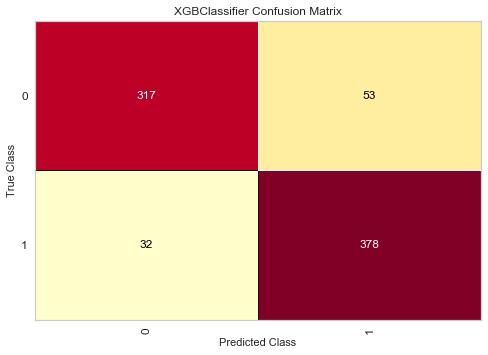

In [75]:
#from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix


xgb_model = xgb.XGBClassifier().fit(X_train, y_train)
cm = ConfusionMatrix(xgb_model, classes=[0,1])
cm.fit(X_train, y_train)
print(cm.score(X_test, y_test))
cm.show()

In [115]:
pn = pd.read_csv('PN.csv' ,encoding ="latin-1!")

In [116]:
pn.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP.,RND
0,1,El Club De Las Feas,Banda El Recodo,1/1/2006,120,81,70,-3,96,2:43,30,33,7276
1,2,El Año Viejo,Los Socios Del Ritmo,11/22/2019,81,91,67,-4,91,2:53,4,46,6752
2,3,Amor a Primera Vista,Los Angeles Azules,6/14/2019,170,76,66,-6,95,3:41,32,81,267
3,4,El Chico Del Apartamento 512,Selena,1994,102,65,76,-10,93,3:29,48,66,6664
4,5,Procura,ChiChi Peralta,7/1/1997,102,76,81,-7,97,4:33,31,13,1230


In [118]:
pn ['LENGTH'] = pn['LENGTH'].str.replace(':','.')
pn[['LENGTH','SEC']] = pn['LENGTH'].str.split('.',expand=True)
pn.rename(columns={'LENGTH':'MIN'}, inplace=True)
pn['MIN'] =  pn['MIN'].astype(int) 
pn['SEC'] = pn['SEC'].astype(int)
pn['MIN'] = pn['MIN'] *60
pn['DURATION'] = pn['MIN'] + pn['SEC']
pn.drop(['MIN', 'SEC'], axis=1, inplace=True)

In [119]:
pn.describe()

,#,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,RND,DURATION
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,275.500000,125.425455,68.394545,69.172727,-6.705455,74.130909,26.380000,56.405455,5110.940000,219.009091
std,158.915596,32.659987,16.369670,12.019761,2.638610,20.121877,21.345351,19.384546,2939.845295,45.162628
min,1.000000,66.000000,23.000000,30.000000,-16.000000,13.000000,0.000000,0.000000,11.000000,124.000000
25%,138.250000,97.000000,58.000000,62.000000,-8.000000,62.000000,9.000000,47.250000,2545.750000,190.000000
50%,275.500000,122.500000,70.000000,71.000000,-6.000000,80.000000,21.000000,60.000000,5162.000000,213.000000
75%,412.750000,152.000000,80.000000,77.000000,-5.000000,91.000000,39.000000,70.000000,7758.750000,239.000000
max,550.000000,204.000000,99.000000,98.000000,-1.000000,99.000000,90.000000,96.000000,9995.000000,595.000000


In [120]:
pn.head()

,#,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,ACOUSTIC,POP.,RND,DURATION
0,1,El Club De Las Feas,Banda El Recodo,1/1/2006,120,81,70,-3,96,30,33,7276,163
1,2,El Año Viejo,Los Socios Del Ritmo,11/22/2019,81,91,67,-4,91,4,46,6752,173
2,3,Amor a Primera Vista,Los Angeles Azules,6/14/2019,170,76,66,-6,95,32,81,267,221
3,4,El Chico Del Apartamento 512,Selena,1994,102,65,76,-10,93,48,66,6664,209
4,5,Procura,ChiChi Peralta,7/1/1997,102,76,81,-7,97,31,13,1230,273


In [121]:
resultadopn = pd.DataFrame(xgb_model.predict(pn[['BPM', 'ENERGY', 'DANCE' , 'LOUD' , 'VALENCE','ACOUSTIC','POP.','DURATION']]))

In [122]:
titleartistpn = pn[['TITLE','ARTIST']]
predictedPN = pd.concat([titleartistpn, resultadopn],axis =1)
predictedPN

,TITLE,ARTIST,0
0,El Club De Las Feas,Banda El Recodo,1
1,El Año Viejo,Los Socios Del Ritmo,1
2,Amor a Primera Vista,Los Angeles Azules,1
3,El Chico Del Apartamento 512,Selena,1
4,Procura,ChiChi Peralta,1
...,...,...,...
545,La Burbuja,Liberación,1
546,Rosas Rojas,Industria del Amor,1
547,Como Una Novela,Los Acosta,1
548,Deja Una Rosa En Tu Balcón,Los Acosta,1


In [123]:
predictedPN.head()

,TITLE,ARTIST,0
0,El Club De Las Feas,Banda El Recodo,1
1,El Año Viejo,Los Socios Del Ritmo,1
2,Amor a Primera Vista,Los Angeles Azules,1
3,El Chico Del Apartamento 512,Selena,1
4,Procura,ChiChi Peralta,1


In [124]:
predictedPN.to_csv("file.csv")

Beats Per Minute (BPM) - The tempo of the song.
Energy - The energy of a song - the higher the value, the more energtic.
Danceability - The higher the value, the easier it is to dance to this song.
Loudness - The higher the value, the louder the song.
Valence - The higher the value, the more positive mood for the song.
Acoustic - The higher the value the more acoustic the song is.


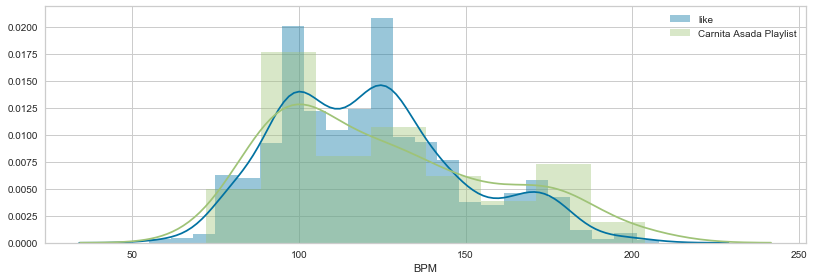

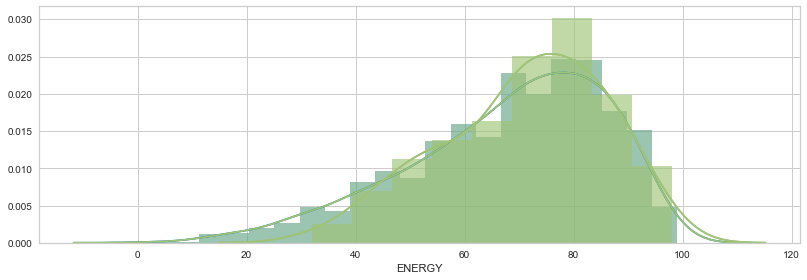

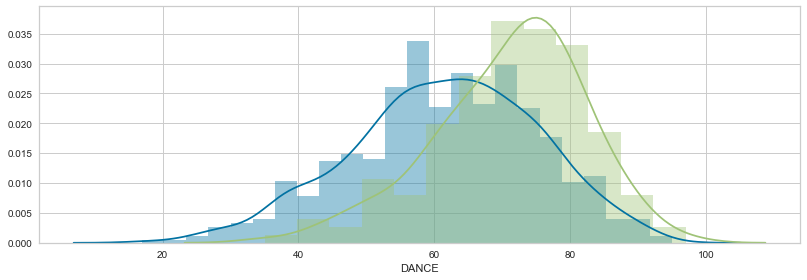

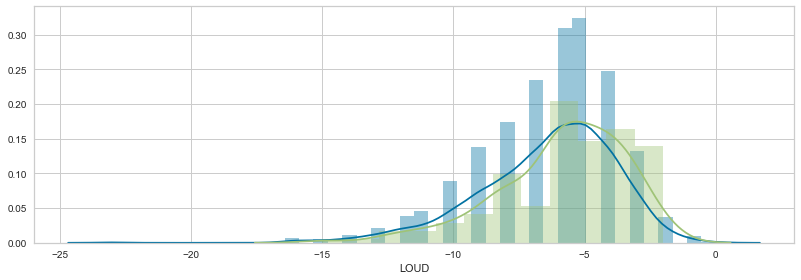

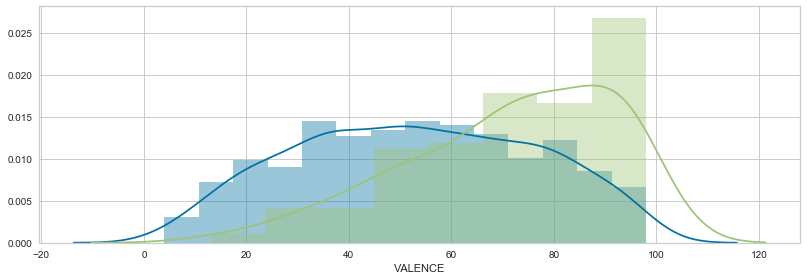

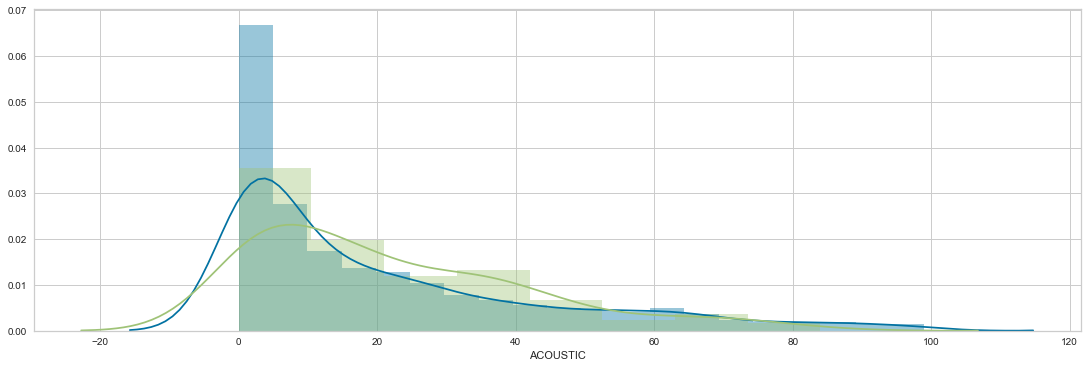

In [106]:
# USE SEABORN'S DISTRIBUTION PLOT
print("Beats Per Minute (BPM) - The tempo of the song.")
plt.figure(figsize=(30, 20))
plt.subplot(421)
sns.distplot(like.BPM, label='like')
sns.distplot(pn.BPM, color='g', label='Carnita Asada Playlist')
plt.xlabel('BPM')
plt.legend()

print("Energy - The energy of a song - the higher the value, the more energtic.")
plt.figure(figsize=(30, 20))
plt.subplot(422)
sns.distplot(like.ENERGY, label='like')
sns.distplot(pn.ENERGY, color='g', label='Carnita Asada Playlist')
sns.distplot(like.ENERGY)
sns.distplot(pn.ENERGY, color='g')
plt.xlabel('ENERGY')


print("Danceability - The higher the value, the easier it is to dance to this song.")
plt.figure(figsize=(30, 20))
plt.subplot(423)
sns.distplot(like.DANCE)
sns.distplot(pn.DANCE, color='g')
plt.xlabel('DANCE')

print("Loudness - The higher the value, the louder the song.")
plt.figure(figsize=(30, 20))
plt.subplot(424)
sns.distplot(like.LOUD)
sns.distplot(pn.LOUD, color='g')
plt.xlabel('LOUD')

print("Valence - The higher the value, the more positive mood for the song.")
plt.figure(figsize=(30, 20))
plt.subplot(425)
sns.distplot(like.VALENCE)
sns.distplot(pn.VALENCE, color='g')
plt.xlabel('VALENCE')

print('Acoustic - The higher the value the more acoustic the song is.')
plt.figure(figsize=(30, 20))
plt.subplot(426)
sns.distplot(like.ACOUSTIC)
sns.distplot(pn.ACOUSTIC, color='g')
plt.xlabel('ACOUSTIC')


plt.tight_layout()
plt.show()

In [125]:
predictedPN

,TITLE,ARTIST,0
0,El Club De Las Feas,Banda El Recodo,1
1,El Año Viejo,Los Socios Del Ritmo,1
2,Amor a Primera Vista,Los Angeles Azules,1
3,El Chico Del Apartamento 512,Selena,1
4,Procura,ChiChi Peralta,1
...,...,...,...
545,La Burbuja,Liberación,1
546,Rosas Rojas,Industria del Amor,1
547,Como Una Novela,Los Acosta,1
548,Deja Una Rosa En Tu Balcón,Los Acosta,1


In [138]:
predictedPN.rename(columns={'0':'Prediction'}, inplace=True)

In [139]:
predictedPN

,TITLE,ARTIST,0
0,El Club De Las Feas,Banda El Recodo,1
1,El Año Viejo,Los Socios Del Ritmo,1
2,Amor a Primera Vista,Los Angeles Azules,1
3,El Chico Del Apartamento 512,Selena,1
4,Procura,ChiChi Peralta,1
...,...,...,...
545,La Burbuja,Liberación,1
546,Rosas Rojas,Industria del Amor,1
547,Como Una Novela,Los Acosta,1
548,Deja Una Rosa En Tu Balcón,Los Acosta,1
